<a href="https://colab.research.google.com/github/thanhle3968/optimal_theory_pair_trading/blob/main/example_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# More deep in Linear Regression

In [ ]:
#install
!pip install backtesting
!pip install mplfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 175.5/175.5 kB 4.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for backtesting: filename=Backtesting-0.3.3-py3-none-any.whl size=173804 sha256=a4bd9fe7e7377ce25feaccb49244967fbbc7ecc88a41a41ad75f5dd36a5011f7
  Stored in directory: /root/.cache/pip/wheels/e2/30/7f/19cbe31987c6ebdb47f1f510343249066711609e3da2d57176
Successfully built backtesting
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.1/73.1 kB 3.0 MB/s eta 0:00:00


In [ ]:
#prepair data
!gdown https://drive.google.com/uc?id=1PukTR0oD53IOiovrV8XncSqkfa2Jj-f3

Downloading...
From: https://drive.google.com/uc?id=1PukTR0oD53IOiovrV8XncSqkfa2Jj-f3
To: /content/tcb_data_feature.csv
100% 601k/601k [00:00<00:00, 65.5MB/s]


In [ ]:
import pandas as pd
import numpy as np

from sklearn.linear_model import LinearRegression #
import statsmodels.api as sm 
import matplotlib.pyplot as plt
import mplfinance as mplf
import warnings
warnings.filterwarnings('ignore')

In [ ]:
data_path = "/content/tcb_data_feature.csv"

In [ ]:
tcb_data_feature = pd.read_csv(data_path)
tcb_data_feature['TradingDate'] = pd.to_datetime(tcb_data_feature['TradingDate'])
tcb_data_feature.set_index('TradingDate', inplace=True)

In [ ]:
tcb_data_feature.tail()

,Open,High,Low,Close,Volume,close_open_diff,high_close_diff,low_close_diff,high_open_diff,low_open_diff,...,bollinger_lband_20,bollinger_hband_20,ema_12,ema_26,close_t1,close_t2,close_t3,open_t1,open_t2,open_t3
TradingDate,,,,,,,,,,,,,,,,,,,,,
2023-05-04,29500.0,29500.0,28900.0,29050.0,1918703,-450.0,450.0,-150.0,0.0,-600.0,...,28447.937876,30617.062124,29347.967727,29001.811941,28700.0,29400.0,29300.0,29050.0,28900.0,29450.0
2023-05-05,29050.0,29200.0,28450.0,28700.0,3438755,-350.0,500.0,-250.0,150.0,-600.0,...,28348.701504,30636.298496,29248.280384,28979.455501,29400.0,29300.0,29300.0,28900.0,29450.0,29350.0
2023-05-08,28900.0,29400.0,28700.0,29400.0,2847866,500.0,0.0,-700.0,500.0,-200.0,...,28343.002294,30631.997706,29271.621863,29010.606945,29300.0,29300.0,NaN,29450.0,29350.0,NaN
2023-05-09,29450.0,29500.0,29050.0,29300.0,1990748,-150.0,200.0,-250.0,50.0,-400.0,...,28326.430630,30618.569370,29275.987731,29032.043468,29300.0,NaN,NaN,29350.0,NaN,NaN
2023-05-10,29350.0,29400.0,29100.0,29300.0,2523530,-50.0,100.0,-200.0,50.0,-250.0,...,28312.132412,30607.867588,29279.681926,29051.892100,NaN,NaN,NaN,NaN,NaN,NaN


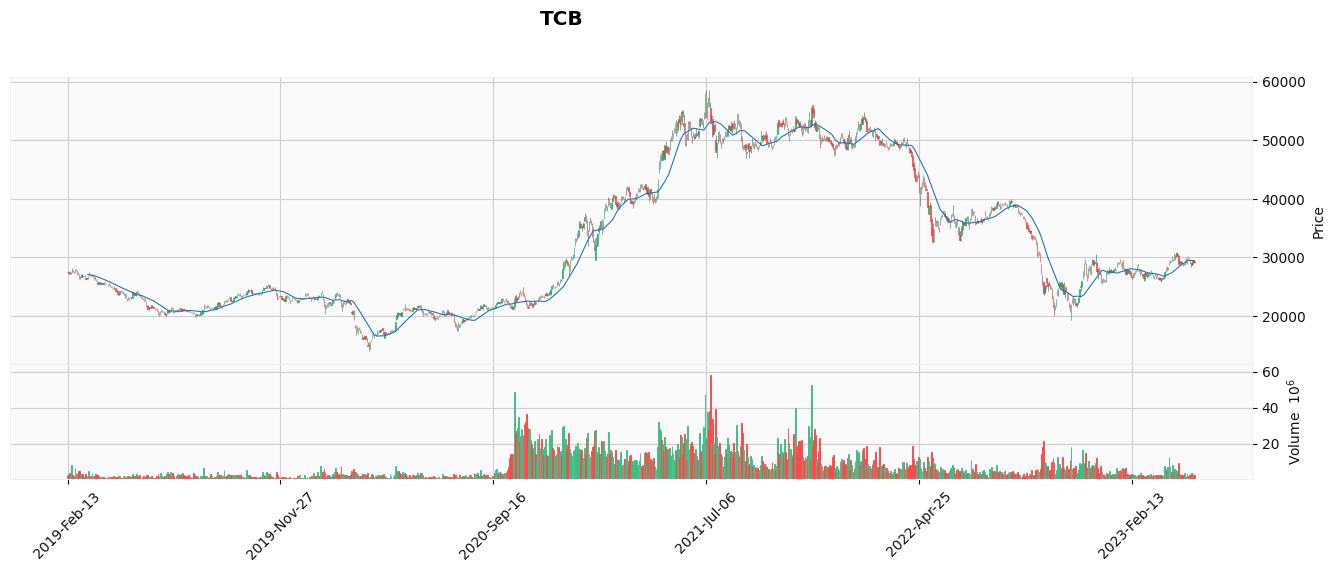

In [ ]:
import mplfinance as mplf


mplf.plot(tcb_data_feature,figratio=(60,20),
          title='TCB',
          type='candle',
          mav=(20),volume=True,
          style="yahoo")
mplf.show()

In [ ]:
tcb_data_feature_train = tcb_data_feature[:'2022-01-01']
tcb_data_feature_validate = tcb_data_feature['2022-01-01':]

In [ ]:
print(tcb_data_feature_train.shape)
print(tcb_data_feature_validate.shape)

(727, 49)
(333, 49)


In [ ]:
tcb_data_feature.columns

Index(['Open', 'High', 'Low', 'Close', 'Volume', 'close_open_diff',
       'high_close_diff', 'low_close_diff', 'high_open_diff', 'low_open_diff',
       'high_low_diff', 'close_p1', 'close_p2', 'close_p3', 'close_p7',
       'close_diff_p1', 'close_diff_p2', 'close_diff_p3', 'close_diff_p7',
       'close_diff_pct_p1', 'close_diff_pct_p2', 'close_diff_pct_p3',
       'close_diff_pct_p7', 'volume_p1', 'volume_p2', 'volume_p3', 'volume_p7',
       'volume_diff_p1', 'volume_diff_p2', 'volume_diff_p3', 'volume_diff_p7',
       'volume_diff_pct_p1', 'volume_diff_pct_p2', 'volume_diff_pct_p3',
       'volume_diff_pct_p7', 'on_balance_volume', 'rsi_window_14',
       'rsi_window_7', 'bollinger_mavg_20', 'bollinger_lband_20',
       'bollinger_hband_20', 'ema_12', 'ema_26', 'close_t1', 'close_t2',
       'close_t3', 'open_t1', 'open_t2', 'open_t3'],
      dtype='object')

In [ ]:
#train
X_train = tcb_data_feature_train[['Open', 'High', 'Low', 'Close', 'Volume', 'close_open_diff',
       'high_close_diff', 'low_close_diff', 'high_open_diff', 'low_open_diff',
       'high_low_diff', 'close_p1', 'close_p2', 'close_p3', 'close_p7',
       'close_diff_p1', 'close_diff_p2', 'close_diff_p3', 'close_diff_p7',
       'close_diff_pct_p1', 'close_diff_pct_p2', 'close_diff_pct_p3',
       'close_diff_pct_p7', 'volume_p1', 'volume_p2', 'volume_p3', 'volume_p7',
       'volume_diff_p1', 'volume_diff_p2', 'volume_diff_p3', 'volume_diff_p7',
       'volume_diff_pct_p1', 'volume_diff_pct_p2', 'volume_diff_pct_p3',
       'volume_diff_pct_p7', 'on_balance_volume', 'rsi_window_14',
       'rsi_window_7', 'bollinger_mavg_20', 'bollinger_lband_20',
       'bollinger_hband_20', 'ema_12', 'ema_26']]
X_train_add_constant = sm.add_constant(X_train)
y_open_t1_train = tcb_data_feature_train['open_t1']
y_open_t3_train = tcb_data_feature_train['open_t3']

In [ ]:
#validate
X_validate = tcb_data_feature_validate[['Open', 'High', 'Low', 'Close', 'Volume', 'close_open_diff',
       'high_close_diff', 'low_close_diff', 'high_open_diff', 'low_open_diff',
       'high_low_diff', 'close_p1', 'close_p2', 'close_p3', 'close_p7',
       'close_diff_p1', 'close_diff_p2', 'close_diff_p3', 'close_diff_p7',
       'close_diff_pct_p1', 'close_diff_pct_p2', 'close_diff_pct_p3',
       'close_diff_pct_p7', 'volume_p1', 'volume_p2', 'volume_p3', 'volume_p7',
       'volume_diff_p1', 'volume_diff_p2', 'volume_diff_p3', 'volume_diff_p7',
       'volume_diff_pct_p1', 'volume_diff_pct_p2', 'volume_diff_pct_p3',
       'volume_diff_pct_p7', 'on_balance_volume', 'rsi_window_14',
       'rsi_window_7', 'bollinger_mavg_20', 'bollinger_lband_20',
       'bollinger_hband_20', 'ema_12', 'ema_26']]

X_validate_add_constant = sm.add_constant(X_validate)
y_open_t1_validate = tcb_data_feature_validate['open_t1']
y_open_t3_validate = tcb_data_feature_validate['open_t3']
max_validate_len = tcb_data_feature_validate.shape[0]

In [ ]:
X_train.shape

(727, 43)

In [ ]:
reg_t1 = sm.OLS(y_open_t1_train, X_train_add_constant)
reg_t3 = sm.OLS(y_open_t3_train, X_train_add_constant)

In [ ]:
reg_t1_results = reg_t1.fit()
reg_t3_results = reg_t3.fit()

## OLS output

In [ ]:
print(reg_t1_results.summary())

                            OLS Regression Results                            
Dep. Variable:                open_t1   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 4.627e+04
Date:                Sat, 13 May 2023   Prob (F-statistic):               0.00
Time:                        12:00:20   Log-Likelihood:                -5157.5
No. Observations:                 727   AIC:                         1.037e+04
Df Residuals:                     698   BIC:                         1.051e+04
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 17.9858    175

## Predict new samples and evaluate

In [ ]:
#train
tcb_data_feature_train['open_t1_predict'] = reg_t1_results.predict(X_train_add_constant)
tcb_data_feature_train['open_t3_predict'] = reg_t3_results.predict(X_train_add_constant)
# validate
tcb_data_feature_validate['open_t1_predict'] = reg_t1_results.predict(X_validate_add_constant)
tcb_data_feature_validate['open_t3_predict'] = reg_t3_results.predict(X_validate_add_constant)
max_validate_len = tcb_data_feature_validate.shape[0]

In [ ]:
X_train['close_diff_pct_p3']


TradingDate
2019-02-13    0.012868
2019-02-14    0.009242
2019-02-15   -0.007286
2019-02-18   -0.007260
2019-02-19    0.009158
                ...   
2021-12-27   -0.001022
2021-12-28    0.038015
2021-12-29    0.004090
2021-12-30    0.009212
2021-12-31    0.017294
Name: close_diff_pct_p3, Length: 727, dtype: float64

In [ ]:
# metrics
from sklearn.metrics import mean_squared_error
# mean_squared_error
print('rmse predict open t1')
print(mean_squared_error(tcb_data_feature_train['open_t1_predict'], tcb_data_feature_train['open_t1'], squared=False))
print(mean_squared_error(tcb_data_feature_validate['open_t1_predict'][0:max_validate_len-1], tcb_data_feature_validate['open_t1'][0:max_validate_len-1], squared=False))


rmse predict open t1
291.5635866490042
343.11345141460197


In [ ]:
print('rmse predict open t3')
print(mean_squared_error(tcb_data_feature_train['open_t3_predict'], tcb_data_feature_train['open_t3'], squared=False))
print(mean_squared_error(tcb_data_feature_validate['open_t3_predict'][0:max_validate_len-3], tcb_data_feature_validate['open_t3'][0:max_validate_len-3], squared=False))

rmse predict open t3
1005.5051915207202
1835.268764384193


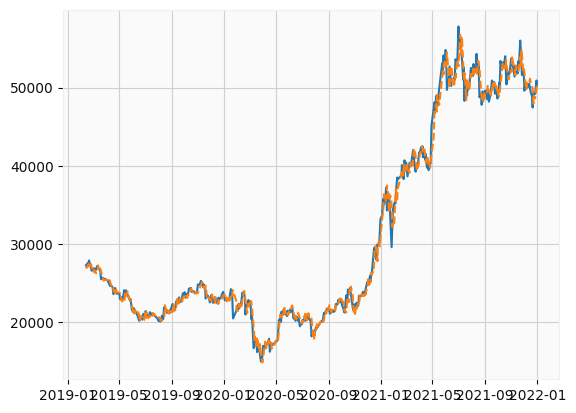

In [ ]:
plt.plot(tcb_data_feature_train['open_t3'], '-')
plt.plot(tcb_data_feature_train['open_t3_predict'], '--')
plt.show()

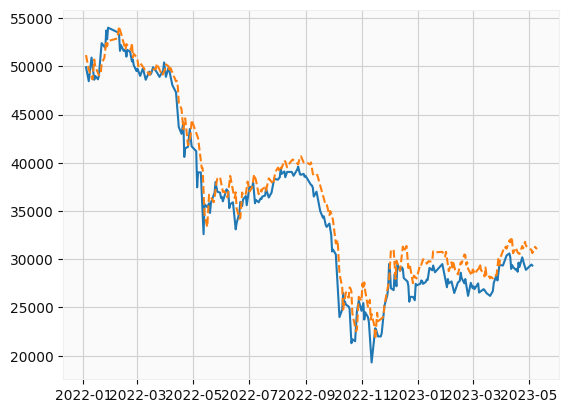

In [ ]:
plt.plot(tcb_data_feature_validate['open_t3'], '-')
plt.plot(tcb_data_feature_validate['open_t3_predict'], '--')
plt.show()

# Lasso/ Ridge regression


### Lasso regression

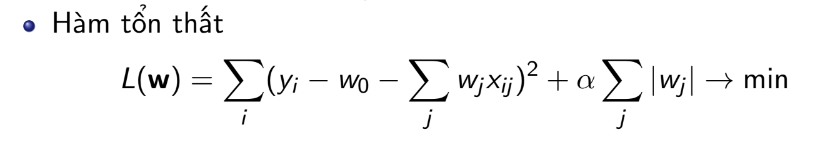

In [ ]:
from sklearn.linear_model import Lasso

In [ ]:
lasso_t1 = Lasso(alpha=1)
lasso_t3 = Lasso(alpha=1)

In [ ]:
lasso_t1_results = lasso_t1.fit(X_train, y_open_t1_train)
lasso_t3_results = lasso_t3.fit(X_train, y_open_t3_train)

In [ ]:
#train
tcb_data_feature_train['open_t1_predict'] = lasso_t1.predict(X_train)
tcb_data_feature_train['open_t3_predict'] = lasso_t3.predict(X_train)
# validate
tcb_data_feature_validate['open_t1_predict'] = lasso_t1.predict(X_validate)
tcb_data_feature_validate['open_t3_predict'] = lasso_t3.predict(X_validate)


In [ ]:
# metrics
from sklearn.metrics import mean_squared_error
# mean_squared_error
print('rmse predict open t1')
print(mean_squared_error(tcb_data_feature_train['open_t1_predict'], tcb_data_feature_train['open_t1'], squared=False))
print(mean_squared_error(tcb_data_feature_validate['open_t1_predict'][0:max_validate_len-1], tcb_data_feature_validate['open_t1'][0:max_validate_len-1], squared=False))


rmse predict open t1
294.4459920016361
343.81752535503995


In [ ]:
print('rmse predict open t3')
print(mean_squared_error(tcb_data_feature_train['open_t3_predict'], tcb_data_feature_train['open_t3'], squared=False))
print(mean_squared_error(tcb_data_feature_validate['open_t3_predict'][0:max_validate_len-3], tcb_data_feature_validate['open_t3'][0:max_validate_len-3], squared=False))

rmse predict open t3
1013.0309116932387
1761.0918209208721


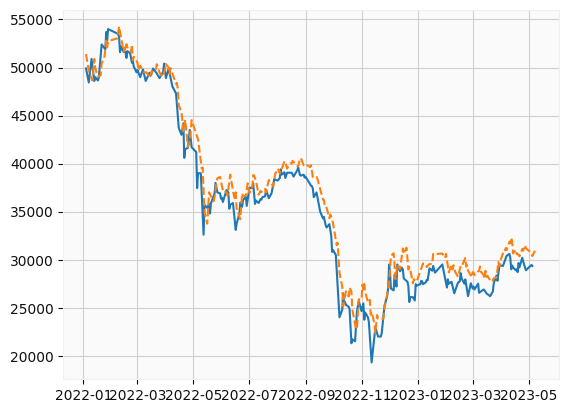

In [ ]:
plt.plot(tcb_data_feature_validate['open_t3'], '-')
plt.plot(tcb_data_feature_validate['open_t3_predict'], '--')
plt.show()

In [ ]:
coef = []
for i, col in enumerate(X_train):
  coef.append({
      'param': col,
      'coefficients': str(lasso_t1.coef_[i])
  })
pd.DataFrame(coef)

,param,coefficients
0,Open,0.9862346393482262
1,High,0.0013869096883423286
2,Low,-0.00021974398784138573
3,Close,0.0014830663375394906
4,Volume,6.574122716270725e-06
5,close_open_diff,1.0557983737741001
6,high_close_diff,-0.0738790060783737
7,low_close_diff,0.046657332124416695
8,high_open_diff,-0.016785948729411616
9,low_open_diff,-0.002635991626310251


## Data scaler

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler_X = StandardScaler()

In [ ]:
# train: fit and transform 
X_train_scaled = scaler_X.fit_transform(X_train)


# validate: NOT fit only transform
X_validate_scaled = scaler_X.transform(X_validate)
X_validate_scaled = scaler_X.transform(X_validate)


# convert to df
X_train_scaled = pd.DataFrame(X_train_scaled, columns = X_train.columns)
X_validate_scaled = pd.DataFrame(X_validate_scaled, columns = X_validate.columns)


In [ ]:
X_train.describe()

,Open,High,Low,Close,Volume,close_open_diff,high_close_diff,low_close_diff,high_open_diff,low_open_diff,...,volume_diff_pct_p3,volume_diff_pct_p7,on_balance_volume,rsi_window_14,rsi_window_7,bollinger_mavg_20,bollinger_lband_20,bollinger_hband_20,ema_12,ema_26
count,727.000000,727.000000,727.000000,727.000000,7.270000e+02,727.000000,727.000000,727.000000,727.000000,727.000000,...,727.000000,727.000000,7.270000e+02,727.000000,727.000000,727.000000,727.000000,727.000000,727.000000,727.000000
mean,30808.321871,31212.929849,30425.722146,30812.104539,8.362447e+06,3.782669,400.825309,-386.382393,404.607978,-382.599725,...,0.173891,0.229577,3.604066e+08,52.726600,52.949631,30517.668501,28455.527021,32579.809980,30640.984691,30407.016639
std,12553.061053,12746.309813,12354.561007,12536.779416,8.949613e+06,628.174689,467.032282,489.778701,487.158884,451.295024,...,0.834490,0.905923,4.237567e+08,13.742371,18.347575,12297.342524,11596.419077,13124.105834,12377.765516,12153.616844
min,15000.000000,15500.000000,14000.000000,14900.000000,4.191300e+05,-3800.000000,0.000000,-4200.000000,0.000000,-3800.000000,...,-0.772843,-0.815325,-1.435479e+07,19.280452,11.307649,16525.000000,13477.285241,17759.069532,16386.719719,17359.495125
25%,21400.000000,21700.000000,21250.000000,21400.000000,1.747365e+06,-250.000000,100.000000,-500.000000,100.000000,-500.000000,...,-0.295783,-0.310327,3.787394e+07,43.327563,39.600387,21366.250000,20364.833498,22838.849754,21317.279844,21354.957182
50%,23800.000000,24000.000000,23550.000000,23750.000000,3.497970e+06,0.000000,250.000000,-200.000000,250.000000,-250.000000,...,-0.020843,-0.017774,8.730948e+07,51.867065,52.928681,23745.000000,22534.954919,24856.710394,23675.798259,23662.221216
75%,41500.000000,41950.000000,40900.000000,41550.000000,1.389610e+07,250.000000,500.000000,-100.000000,500.000000,-100.000000,...,0.419449,0.493667,7.480306e+08,63.224274,67.768961,40952.500000,38231.844291,42799.520686,40982.236048,40505.413815
max,57800.000000,58600.000000,55600.000000,58000.000000,5.823550e+07,3200.000000,4600.000000,0.000000,3750.000000,0.000000,...,12.297321,8.066573,1.217827e+09,88.978351,93.938636,53310.000000,50926.013910,58232.764142,54700.272105,53191.241270


In [ ]:
X_train_scaled.describe()


,Open,High,Low,Close,Volume,close_open_diff,high_close_diff,low_close_diff,high_open_diff,low_open_diff,...,volume_diff_pct_p3,volume_diff_pct_p7,on_balance_volume,rsi_window_14,rsi_window_7,bollinger_mavg_20,bollinger_lband_20,bollinger_hband_20,ema_12,ema_26
count,7.270000e+02,7.270000e+02,727.000000,7.270000e+02,7.270000e+02,7.270000e+02,7.270000e+02,7.270000e+02,727.000000,7.270000e+02,...,7.270000e+02,7.270000e+02,727.000000,7.270000e+02,7.270000e+02,7.270000e+02,7.270000e+02,7.270000e+02,7.270000e+02,7.270000e+02
mean,-1.563780e-16,3.909451e-17,0.000000,-1.563780e-16,3.909451e-17,-1.832555e-17,-3.909451e-17,3.909451e-17,0.000000,7.818902e-17,...,2.443407e-18,-3.176429e-17,0.000000,-5.668704e-16,1.172835e-16,-1.172835e-16,-1.954726e-16,2.345671e-16,7.037012e-16,1.172835e-16
std,1.000688e+00,1.000688e+00,1.000688,1.000688e+00,1.000688e+00,1.000688e+00,1.000688e+00,1.000688e+00,1.000688,1.000688e+00,...,1.000688e+00,1.000688e+00,1.000688,1.000688e+00,1.000688e+00,1.000688e+00,1.000688e+00,1.000688e+00,1.000688e+00,1.000688e+00
min,-1.260187e+00,-1.233592e+00,-1.330442,-1.270108e+00,-8.881709e-01,-6.059463e+00,-8.588299e-01,-7.791770e+00,-0.831118,-7.577644e+00,...,-1.135287e+00,-1.154206e+00,-0.884988,-2.435473e+00,-2.271180e+00,-1.138645e+00,-1.292516e+00,-1.130054e+00,-1.152395e+00,-1.074290e+00
25%,-7.500003e-01,-7.468420e-01,-0.743210,-7.512762e-01,-7.396562e-01,-4.042783e-01,-6.445645e-01,-2.321371e-01,-0.625705,-2.603200e-01,...,-5.632144e-01,-5.963813e-01,-0.761651,-6.844166e-01,-7.280763e-01,-7.446909e-01,-6.981693e-01,-7.427300e-01,-7.537810e-01,-7.453165e-01
50%,-5.586802e-01,-5.662734e-01,-0.556916,-5.636987e-01,-5.439147e-01,-6.025828e-03,-3.231664e-01,3.808061e-01,-0.317585,2.940228e-01,...,-2.335171e-01,-2.732254e-01,-0.644911,-6.258942e-02,-1.142662e-03,-5.511216e-01,-5.109033e-01,-5.888719e-01,-5.631050e-01,-5.553441e-01
75%,8.523052e-01,8.429469e-01,0.848390,8.571012e-01,6.187377e-01,3.922266e-01,2.124970e-01,5.851205e-01,0.195948,6.266284e-01,...,2.944639e-01,2.917163e-01,0.915362,7.644169e-01,8.082557e-01,8.491278e-01,8.436266e-01,7.792338e-01,8.360452e-01,8.314685e-01
max,2.151687e+00,2.150107e+00,2.039053,2.170144e+00,5.576486e+00,5.091606e+00,8.997377e+00,7.894349e-01,6.871876,8.483655e-01,...,1.453795e+01,8.656799e+00,2.024772,2.639771e+00,2.235567e+00,1.854712e+00,1.939043e+00,1.955990e+00,1.945089e+00,1.875977e+00


In [ ]:
lasso_t1 = Lasso(alpha=1)
lasso_t3 = Lasso(alpha=1)

In [ ]:
lasso_t1_results = lasso_t1.fit(X_train_scaled, y_open_t1_train)
lasso_t3_results = lasso_t3.fit(X_train_scaled, y_open_t3_train)

In [ ]:
#train
tcb_data_feature_train['open_t1_predict'] = lasso_t1.predict(X_train_scaled)
tcb_data_feature_train['open_t3_predict'] = lasso_t3.predict(X_train_scaled)
# validate
tcb_data_feature_validate['open_t1_predict'] = lasso_t1.predict(X_validate_scaled)
tcb_data_feature_validate['open_t3_predict'] = lasso_t3.predict(X_validate_scaled)


In [ ]:
# metrics
from sklearn.metrics import mean_squared_error
# mean_squared_error
print('rmse predict open t1')
print(mean_squared_error(tcb_data_feature_train['open_t1_predict'], tcb_data_feature_train['open_t1'], squared=False))
print(mean_squared_error(tcb_data_feature_validate['open_t1_predict'][0:max_validate_len-1], tcb_data_feature_validate['open_t1'][0:max_validate_len-1], squared=False))


rmse predict open t1
292.36526066621366
338.5610460037297


In [ ]:
print('rmse predict open t3')
print(mean_squared_error(tcb_data_feature_train['open_t3_predict'], tcb_data_feature_train['open_t3'], squared=False))
print(mean_squared_error(tcb_data_feature_validate['open_t3_predict'][0:max_validate_len-3], tcb_data_feature_validate['open_t3'][0:max_validate_len-3], squared=False))

rmse predict open t3
1008.0035166566621
1761.822480785648


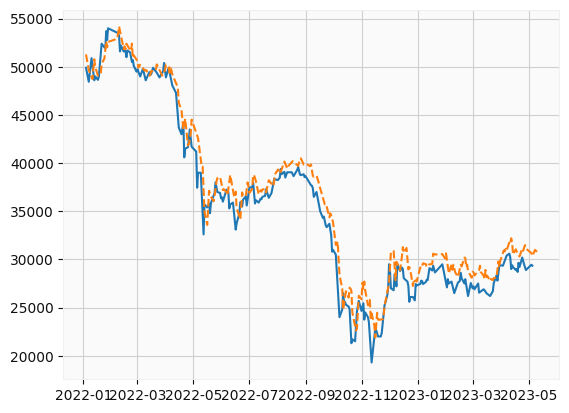

In [ ]:
plt.plot(tcb_data_feature_validate['open_t3'], '-')
plt.plot(tcb_data_feature_validate['open_t3_predict'], '--')
plt.show()

In [ ]:
coef = []
for i, col in enumerate(X_train):
  coef.append({
      'param': col,
      'coefficients': str(lasso_t1.coef_[i])
  })
pd.DataFrame(coef)

,param,coefficients
0,Open,12479.676208855784
1,High,15.711160116251373
2,Low,4.75807425807488
3,Close,13.501927482701527
4,Volume,37.769203883039594
5,close_open_diff,621.6620276573656
6,high_close_diff,-42.86125045834624
7,low_close_diff,-0.0
8,high_open_diff,0.0
9,low_open_diff,26.192003422044362


## Ridge regression


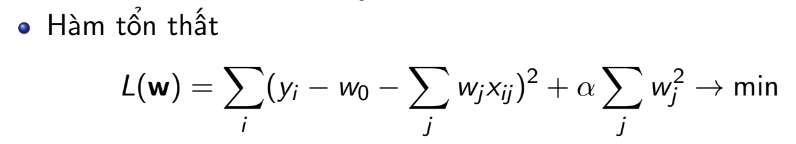

In [ ]:
from sklearn.linear_model import Ridge

In [ ]:
ridge_t1 = Ridge(alpha=1)
ridge_t3 = Ridge(alpha=1)

In [ ]:
ridge_t1_results = ridge_t1.fit(X_train_scaled, y_open_t1_train)
ridge_t3_results = ridge_t3.fit(X_train_scaled, y_open_t3_train)

In [ ]:
#train
tcb_data_feature_train['open_t1_predict'] = ridge_t1.predict(X_train_scaled)
tcb_data_feature_train['open_t3_predict'] = ridge_t3.predict(X_train_scaled)
# validate
tcb_data_feature_validate['open_t1_predict'] = ridge_t1.predict(X_validate_scaled)
tcb_data_feature_validate['open_t3_predict'] = ridge_t3.predict(X_validate_scaled)


In [ ]:
# metrics
from sklearn.metrics import mean_squared_error
# mean_squared_error
print('rmse predict open t1')
print(mean_squared_error(tcb_data_feature_train['open_t1_predict'], tcb_data_feature_train['open_t1'], squared=False))
print(mean_squared_error(tcb_data_feature_validate['open_t1_predict'][0:max_validate_len-1], tcb_data_feature_validate['open_t1'][0:max_validate_len-1], squared=False))


rmse predict open t1
294.4617566723861
344.7316998740321


In [ ]:
print('rmse predict open t3')
print(mean_squared_error(tcb_data_feature_train['open_t3_predict'], tcb_data_feature_train['open_t3'], squared=False))
print(mean_squared_error(tcb_data_feature_validate['open_t3_predict'][0:max_validate_len-3], tcb_data_feature_validate['open_t3'][0:max_validate_len-3], squared=False))

rmse predict open t3
1008.5683378606258
1753.654977467344


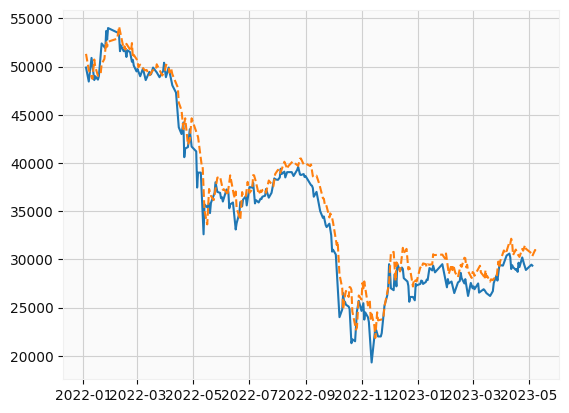

In [ ]:
plt.plot(tcb_data_feature_validate['open_t3'], '-')
plt.plot(tcb_data_feature_validate['open_t3_predict'], '--')
plt.show()

In [ ]:
coef = []
for i, col in enumerate(X_train):
  coef.append({
      'param': col,
      'coefficients': str(ridge_t1.coef_[i])
  })
pd.DataFrame(coef)

,param,coefficients
0,Open,1394.973067427887
1,High,1373.9235867422938
2,Low,1418.1073119338073
3,Close,1400.2487362515528
4,Volume,11.736119845786671
5,close_open_diff,69.1327612653993
6,high_close_diff,-90.25893754937294
7,low_close_diff,-70.47312161543545
8,high_open_diff,2.6143693065633835
9,low_open_diff,19.745878841249823


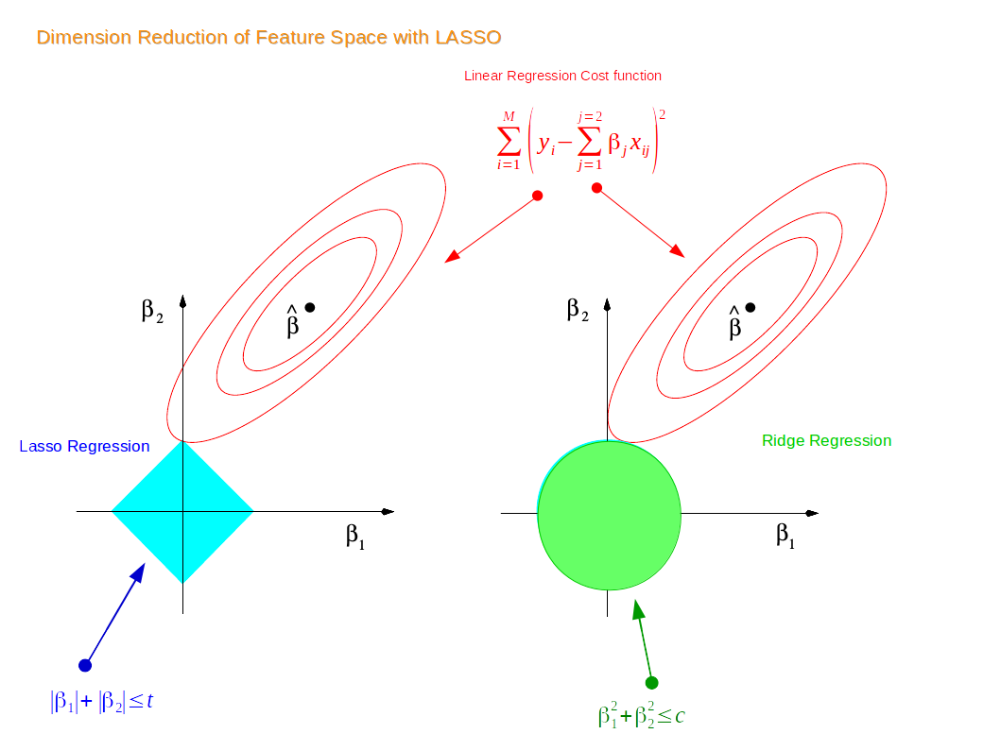

## Hyperparameter tuning

In [ ]:
from sklearn.linear_model import Ridge

In [ ]:
lasso_t1 = Lasso(alpha=2)
lasso_t3 = Lasso(alpha=2)

In [ ]:
lasso_t1_results = lasso_t1.fit(X_train_scaled, y_open_t1_train)
lasso_t3_results = lasso_t3.fit(X_train_scaled, y_open_t3_train)

In [ ]:
#train
tcb_data_feature_train['open_t1_predict'] = lasso_t1.predict(X_train_scaled)
tcb_data_feature_train['open_t3_predict'] = lasso_t3.predict(X_train_scaled)
# validate
tcb_data_feature_validate['open_t1_predict'] = lasso_t1.predict(X_validate_scaled)
tcb_data_feature_validate['open_t3_predict'] = lasso_t3.predict(X_validate_scaled)


In [ ]:
# metrics
from sklearn.metrics import mean_squared_error
# mean_squared_error
print('rmse predict open t1')
print(mean_squared_error(tcb_data_feature_train['open_t1_predict'], tcb_data_feature_train['open_t1'], squared=False))
print(mean_squared_error(tcb_data_feature_validate['open_t1_predict'][0:max_validate_len-1], tcb_data_feature_validate['open_t1'][0:max_validate_len-1], squared=False))


rmse predict open t1
292.92971610467083
336.9447286285935


In [ ]:
print('rmse predict open t3')
print(mean_squared_error(tcb_data_feature_train['open_t3_predict'], tcb_data_feature_train['open_t3'], squared=False))
print(mean_squared_error(tcb_data_feature_validate['open_t3_predict'][0:max_validate_len-3], tcb_data_feature_validate['open_t3'][0:max_validate_len-3], squared=False))

rmse predict open t3
1009.1236790287352
1733.355006755515


**Need some data for tunning hyperparameters**

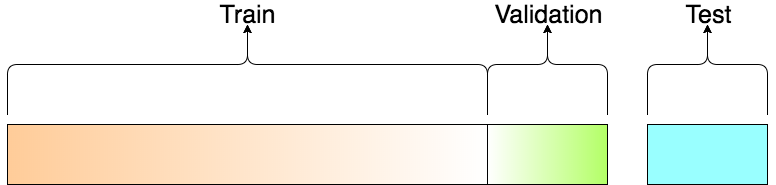

In [ ]:
# hyper_tun_set
len_validate = X_validate_scaled.shape[0]

# X
X_hyper_tun_scaled = X_validate_scaled[:int(len_validate * 0.5)]
X_validate_scaled = X_validate_scaled[int(len_validate * 0.5):]

# y
y_open_t1_hyper_tun = y_open_t1_validate[:int(len_validate * 0.5)]
y_open_t1_validate = y_open_t1_validate[int(len_validate * 0.5):]

y_open_t3_hyper_tun = y_open_t3_validate[:int(len_validate * 0.5)]
y_open_t3_validate = y_open_t3_validate[int(len_validate * 0.5):]

In [ ]:
print(X_train_scaled.shape)
print(X_hyper_tun_scaled.shape)
print(X_validate_scaled.shape)


(727, 43)
(166, 43)
(167, 43)


In [ ]:
lasso_t1 = Lasso(alpha=2)
lasso_t3 = Lasso(alpha=2)

In [ ]:
lasso_t1_results = lasso_t1.fit(X_train_scaled, y_open_t1_train)
lasso_t3_results = lasso_t3.fit(X_train_scaled, y_open_t3_train)

In [ ]:
#train
y_open_t1_train_predict = lasso_t1.predict(X_train_scaled)
y_open_t3_train_predict = lasso_t3.predict(X_train_scaled)
# validate
y_t1_hyper_tun_predict = lasso_t1.predict(X_hyper_tun_scaled)
y_t3_hyper_tun_predict = lasso_t3.predict(X_hyper_tun_scaled)



In [ ]:
# metrics
from sklearn.metrics import mean_squared_error
# mean_squared_error
print('rmse predict open t1')
print(mean_squared_error(y_open_t1_train_predict, y_open_t1_train, squared=False))
print(mean_squared_error(y_t1_hyper_tun_predict, y_open_t1_hyper_tun, squared=False))


rmse predict open t1
292.92971610467083
342.43643709566044


In [ ]:
print('rmse predict open t3')
print(mean_squared_error(y_open_t3_train_predict, y_open_t3_train, squared=False))
print(mean_squared_error(y_t3_hyper_tun_predict, y_open_t3_hyper_tun, squared=False))

rmse predict open t3
1009.1236790287352
1475.1923362401703


In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
alphas = [1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40,45,50,55,100, 150, 200, 250, 500, 650, 700, 750, 800]
rmse_t1 = 100000
rmse_t3 = 100000
alpha_t1 = None
alpha_t3 = None

for alpha in alphas:
  lasso_t1 = Lasso(alpha=alpha)
  lasso_t1_results = lasso_t1.fit(X_train_scaled, y_open_t1_train)
  y_t1_hyper_tun_predict = lasso_t1.predict(X_hyper_tun_scaled)
  current_rmse = mean_squared_error(y_t1_hyper_tun_predict, y_open_t1_hyper_tun, squared=False)
  if current_rmse < rmse_t1:
    rmse_t1 = current_rmse
    alpha_t1 = alpha


for alpha in alphas:
  lasso_t3 = Lasso(alpha=alpha)
  lasso_t3_results = lasso_t3.fit(X_train_scaled, y_open_t3_train)
  y_t3_hyper_tun_predict = lasso_t3.predict(X_hyper_tun_scaled)
  current_rmse = mean_squared_error(y_t3_hyper_tun_predict, y_open_t3_hyper_tun, squared=False)
  if current_rmse < rmse_t3:
    rmse_t3 = current_rmse
    alpha_t3 = alpha

In [ ]:
print(alpha_t1, rmse_t1)

10 340.3130293168756


In [ ]:
print(alpha_t3, rmse_t3)

500 1271.6028008000023


In [ ]:
# final report
lasso_t1 = Lasso(alpha=10)
lasso_t3 = Lasso(alpha=500)

lasso_t1_results = lasso_t1.fit(X_train_scaled, y_open_t1_train)
lasso_t3_results = lasso_t3.fit(X_train_scaled, y_open_t3_train)

#train
y_open_t1_train_predict = lasso_t1.predict(X_train_scaled)
y_open_t3_train_predict = lasso_t3.predict(X_train_scaled)

#hyper_tun
y_t1_hyper_tun_predict = lasso_t1.predict(X_hyper_tun_scaled)
y_t3_hyper_tun_predict = lasso_t3.predict(X_hyper_tun_scaled)

# validate
y_open_t1_validate_predict = lasso_t1.predict(X_validate_scaled)
y_open_t3_validate_predict = lasso_t3.predict(X_validate_scaled)



In [ ]:
# mean_squared_error
print('rmse predict open t1')
print(mean_squared_error(y_open_t1_train_predict, y_open_t1_train, squared=False))
print(mean_squared_error(y_open_t1_validate_predict[:-1], y_open_t1_validate[:-1], squared=False))

rmse predict open t1
295.9287367215781
331.0400336874281


In [ ]:
print('rmse predict open t3')
print(mean_squared_error(y_open_t3_train_predict, y_open_t3_train, squared=False))
print(mean_squared_error(y_open_t3_validate_predict[:-3], y_open_t3_validate[:-3], squared=False))

rmse predict open t3
1156.0992865144551
1625.9835474198708


In [ ]:
coef = []
for i, col in enumerate(X_train):
  coef.append({
      'param': col,
      'coefficients_t1': str(lasso_t1.coef_[i]),
      'coefficients_t3': str(lasso_t3.coef_[i])

  })
pd.DataFrame(coef)

,param,coefficients_t1,coefficients_t3
0,Open,12097.669565568582,0.0
1,High,10.419651972528277,4488.870566798497
2,Low,144.27270178246283,1729.1402342236738
3,Close,12.11391396746798,5476.807942499813
4,Volume,0.0,0.0
5,close_open_diff,592.1911588095963,0.0
6,high_close_diff,-18.01282298826872,0.0
7,low_close_diff,-0.0,-0.0
8,high_open_diff,0.0,0.0
9,low_open_diff,10.25303413590254,-0.0


In [ ]:
tcb_data_feature_hyper_tun = tcb_data_feature_validate[:X_hyper_tun_scaled.shape[0]]
tcb_data_feature_validate = tcb_data_feature_validate[X_hyper_tun_scaled.shape[0]:]

In [ ]:
tcb_data_feature_validate.shape

(167, 51)

In [ ]:
tcb_data_feature_hyper_tun['predict_t3_t1_diff'] = y_t3_hyper_tun_predict/ y_t1_hyper_tun_predict - 1
tcb_data_feature_validate['predict_t3_t1_diff'] = y_open_t3_validate_predict/ y_open_t1_validate_predict - 1

In [ ]:
tcb_data_feature_validate['predict_t3_t1_diff']

TradingDate
2022-09-07    0.015651
2022-09-08    0.007238
2022-09-09    0.000726
2022-09-12    0.005865
2022-09-13    0.006781
                ...   
2023-05-04    0.030417
2023-05-05    0.031484
2023-05-08    0.018089
2023-05-09    0.026313
2023-05-10    0.024275
Name: predict_t3_t1_diff, Length: 167, dtype: float64

# Backtest

In [ ]:
tcb_data_feature_train['Open'] *= 100
tcb_data_feature_train['High'] *= 100
tcb_data_feature_train['Low'] *= 100
tcb_data_feature_train['Close'] *= 100

tcb_data_feature_hyper_tun['Open'] *= 100
tcb_data_feature_hyper_tun['High'] *= 100
tcb_data_feature_hyper_tun['Low'] *= 100
tcb_data_feature_hyper_tun['Close'] *= 100

tcb_data_feature_validate['Open'] *= 100
tcb_data_feature_validate['High'] *= 100
tcb_data_feature_validate['Low'] *= 100
tcb_data_feature_validate['Close'] *= 100



In [ ]:
from backtesting import Backtest
from backtesting import Strategy
from backtesting.lib import crossover
import math

class MyStrategy(Strategy):
    thresh_hold = 0.037

    # Do as much initial computation as possible
    def init(self):
      self.indicator = self.I(lambda x: x, self.data.predict_t3_t1_diff, name='indicator')

    def next(self):
      if self.data.predict_t3_t1_diff > self.thresh_hold: #buy
        self.buy()
      if len(self.trades) != 0:
        for trade in self.trades:
          if self.data.index[-2] >= trade.entry_time:
            trade.close() # ban mo cua 

In [ ]:
bt_train = Backtest(tcb_data_feature_hyper_tun, MyStrategy, cash=20_000_000, commission=0.005)
optim = bt_train.optimize(
    thresh_hold = list(np.arange(0.0, 0.07, 0.001)),
    maximize = 'Win Rate [%]',
)

bt_train.plot()

Backtest.optimize:   0%|          | 0/2 [00:00<?, ?it/s]

Row(id='1475', ...)

In [ ]:
optim

Start                     2022-01-04 00:00:00
End                       2022-09-06 00:00:00
Duration                    245 days 00:00:00
Exposure Time [%]                    3.614458
Equity Final [$]                   21132950.0
Equity Peak [$]                    21132950.0
Return [%]                            5.66475
Buy & Hold Return [%]              -24.066798
Return (Ann.) [%]                    8.724562
Volatility (Ann.) [%]               14.517906
Sharpe Ratio                         0.600952
Sortino Ratio                        1.048205
Calmar Ratio                         1.304364
Max. Drawdown [%]                    -6.68875
Avg. Drawdown [%]                   -3.738443
Max. Drawdown Duration        5 days 00:00:00
Avg. Drawdown Duration        4 days 00:00:00
# Trades                                    2
Win Rate [%]                            100.0
Best Trade [%]                       4.612887
Worst Trade [%]                      1.203385
Avg. Trade [%]                    

In [ ]:
optim['_trades']

,Size,EntryBar,ExitBar,EntryPrice,ExitPrice,PnL,ReturnPct,EntryTime,ExitTime,Duration
0,5,86,88,3527550.0,3570000.0,212250.0,0.012034,2022-05-16,2022-05-18,2 days
1,6,112,114,3326550.0,3480000.0,920700.0,0.046129,2022-06-21,2022-06-23,2 days


In [ ]:
optim['_strategy']

<Strategy MyStrategy(thresh_hold=0.037)>

In [ ]:
bt_validate = Backtest(tcb_data_feature_validate, MyStrategy, cash=20_000_000, commission=0.005)
stats = bt_validate.run()
bt_validate.plot()

Row(id='2287', ...)

In [ ]:
stats

Start                     2022-09-07 00:00:00
End                       2023-05-10 00:00:00
Duration                    245 days 00:00:00
Exposure Time [%]                   65.269461
Equity Final [$]                   15944950.0
Equity Peak [$]                    20000000.0
Return [%]                          -20.27525
Buy & Hold Return [%]              -21.970706
Return (Ann.) [%]                  -28.959525
Volatility (Ann.) [%]                24.76775
Sharpe Ratio                              0.0
Sortino Ratio                             0.0
Calmar Ratio                              0.0
Max. Drawdown [%]                   -26.82525
Avg. Drawdown [%]                   -26.82525
Max. Drawdown Duration      219 days 00:00:00
Avg. Drawdown Duration      219 days 00:00:00
# Trades                                   45
Win Rate [%]                        48.888889
Best Trade [%]                      17.804759
Worst Trade [%]                    -14.712154
Avg. Trade [%]                    

In [ ]:
stats['_trades']

,Size,EntryBar,ExitBar,EntryPrice,ExitPrice,PnL,ReturnPct,EntryTime,ExitTime,Duration
0,6,19,21,3095400.0,3050000.0,-272400.0,-0.014667,2022-10-04,2022-10-06,2 days
1,6,22,24,2904450.0,2580000.0,-1946700.0,-0.111708,2022-10-07,2022-10-11,4 days
2,6,24,26,2592900.0,2480000.0,-677400.0,-0.043542,2022-10-11,2022-10-13,2 days
3,6,26,28,2492400.0,2550000.0,345600.0,0.023110,2022-10-13,2022-10-17,4 days
4,6,28,30,2562750.0,2530000.0,-196500.0,-0.012779,2022-10-17,2022-10-19,2 days
5,6,30,32,2542650.0,2485000.0,-345900.0,-0.022673,2022-10-19,2022-10-21,2 days
6,6,32,34,2497425.0,2130000.0,-2204550.0,-0.147122,2022-10-21,2022-10-25,4 days
7,6,34,36,2140650.0,2150000.0,56100.0,0.004368,2022-10-25,2022-10-27,2 days
8,6,36,38,2160750.0,2460000.0,1795500.0,0.138494,2022-10-27,2022-10-31,4 days
9,6,39,41,2512500.0,2465000.0,-285000.0,-0.018905,2022-11-01,2022-11-03,2 days
